# Linear Regression

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Read and process data
x_file = 'data/linearX.csv'
y_file = 'data/linearY.csv'

X = pandas.read_csv(x_file, header=None).values
Y = np.squeeze(pandas.read_csv(y_file, header=None).values)
m = X.shape[0]

# normalize
X = (X - np.mean(X)) / np.std(X)

## Gradient descent

In [3]:
def grad_descent(X, Y, lr, eps):

    X1 = np.append(np.ones(X.shape), X, axis=1)

    # initialize theta to zeros
    theta = np.zeros(X.shape[1] + 1)
    J_theta_old = np.inf
    i = 0
    theta_all, J_theta_all = [], []
    while True:
        theta_all.append(theta)
        J_theta_all.append(J_theta_old)
        # evaluate cost function: J_theta
        E = Y - np.matmul(X1, theta)
        J_theta = np.matmul(np.transpose(E), E) / (2 * m)
        # check convergence
        if abs(J_theta - J_theta_old) < eps or i > 500:
            break
        # if not converged, update parameters
        E = Y - np.matmul(X1, theta)
        theta = theta + lr * ((X1.T @ E) / m)
        J_theta_old = J_theta.copy()
        i += 1

    print('Theta = {}'.format(theta))
    return theta, theta_all, J_theta_all

In [4]:
lr = 0.1
theta_opt, theta_all, J_theta_all = grad_descent(X, Y, lr=lr, eps=1e-9)

Theta = [0.99653574 0.00134008]


## 2D plot of data and linear regression model

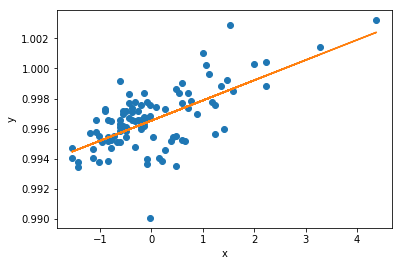

In [5]:
X1 = np.append(np.ones(X.shape), X, axis=1)
Y_pred = X1 @ theta_opt
plt.plot(X, Y, 'o')
plt.plot(X, Y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Contour plot

In [6]:
def J_theta_func(X1, theta0, theta1):
    theta = [theta0, theta1]
    # E = Y - X*theta1 - theta0
    E = Y - X1 @ theta
    J_theta = (E.T @ E) / (2 * m)
    return J_theta

<IPython.core.display.Javascript object>


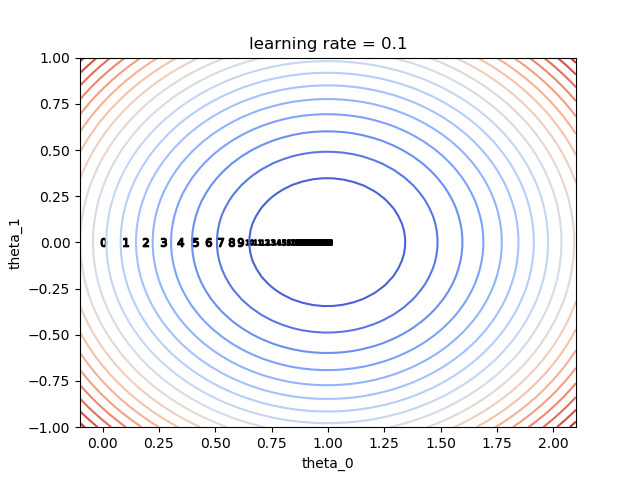

In [9]:
%matplotlib notebook
pause = 0.01
plt.figure(1)
# append intercept term to X
X1 = np.append(np.ones(X.shape), X, axis=1)

theta0 = np.linspace(-0.1,2.1)
theta1 = np.linspace(-1, 1)
theta0_arr, theta1_arr = np.meshgrid(theta0, theta1)
J_theta_arr = np.zeros_like(theta0_arr)
for i in range(theta0_arr.shape[0]):
    for j in range(theta0_arr.shape[1]):
        J_theta_arr[i, j] = J_theta_func(X1, theta0_arr[i, j], theta1_arr[i, j])
plt.contour(theta0_arr, theta1_arr, J_theta_arr, cmap=cm.coolwarm, linewidth=0, xlabel='theta_0', ylabel='theta_1', levels=20)
plt.title('learning rate = {}'.format(lr))
plt.xlabel('theta_0')
plt.ylabel('theta_1')

theta_all = np.asarray(theta_all)
for i in range(len(J_theta_all)):
    plt.scatter(theta_all[i,0], theta_all[i,1], marker='${}$'.format(i), c='black')
    plt.pause(pause)

plt.show()

## Mesh plot

<IPython.core.display.Javascript object>


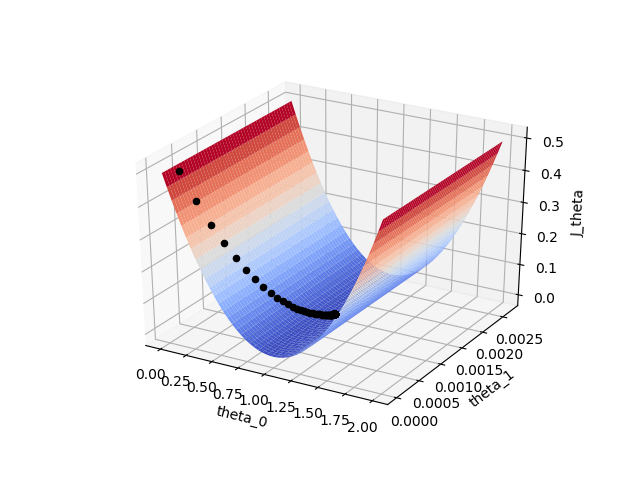

In [8]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')

X1 = np.append(np.ones(X.shape), X, axis=1)
theta_arr = np.asarray(theta_all)
theta0 = np.linspace(theta_arr[0, 0], 2*theta_arr[-1, 0])
theta1 = np.linspace(theta_arr[0, 1], 2*theta_arr[-1, 1])

theta0_arr, theta1_arr = np.meshgrid(theta0, theta1)
J_theta_mat = np.zeros_like(theta0_arr)
for i in range(theta0_arr.shape[0]):
    for j in range(theta0_arr.shape[1]):
        J_theta_mat[i, j] = J_theta_func(X1, theta0_arr[i, j], theta1_arr[i, j])
ax.plot_surface(theta0_arr, theta1_arr, J_theta_mat, cmap=cm.coolwarm, linewidth=0)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('J_theta')

for i in range(len(J_theta_all)):
    ax.scatter(theta_arr[i,0], theta_arr[i,1], J_theta_all[i], 'o', color='black')
    plt.pause(pause)

plt.show()